In [10]:
import numpy as np 
# --- mnucosmomap ---
from mnucosmomap import util as UT
from mnucosmomap import catalogs as mNuCat
%env MNUCOSMOMAP_DIR=/global/cscratch1/sd/chahah/mNuCosmoMap/
%env MNUCOSMOMAP_CODEDIR=/global/homes/c/chahah/projects/mNuCosmoMap/

env: MNUCOSMOMAP_DIR=/global/cscratch1/sd/chahah/mNuCosmoMap/
env: MNUCOSMOMAP_CODEDIR=/global/homes/c/chahah/projects/mNuCosmoMap/


In [1]:
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [32]:
nreal = 1
dfields = [] 
mneuts = [0.0, 0.06, 0.10, 0.15, 0.6]
ics = mNuCat.mNuICs_subbox(10, nreal, sim='paco', verbose=True)
for mneut in mneuts: 
    dfield = mNuCat.mNuDispField_subbox(10, mneut, nreal, 2, 
                                        sim='paco', boundary_correct=True, overwrite=False, verbose=True)
    dfields.append(dfield)

reading in 10 of 8^3 subboxes
reading in 10 of 8^3 subboxes
reading in 10 of 8^3 subboxes
reading in 10 of 8^3 subboxes
reading in 10 of 8^3 subboxes
reading in 10 of 8^3 subboxes


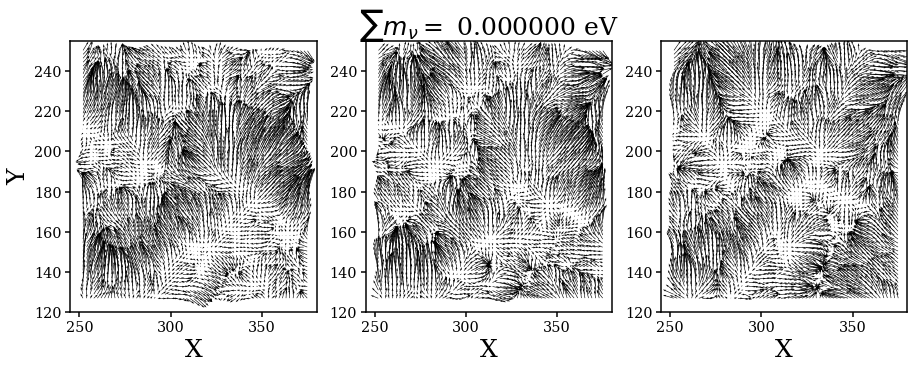

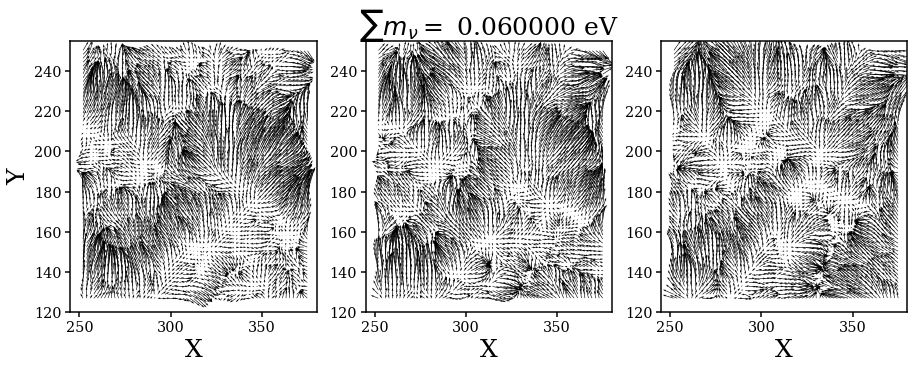

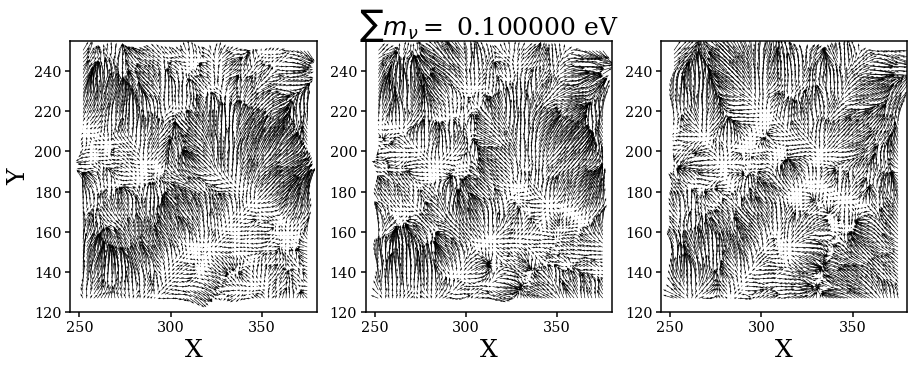

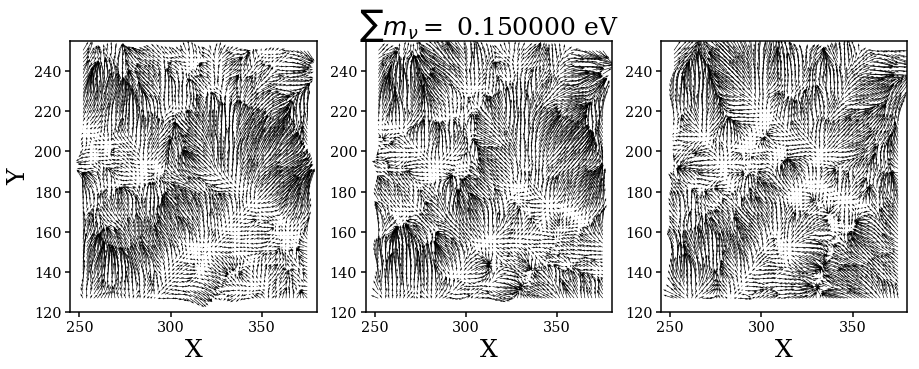

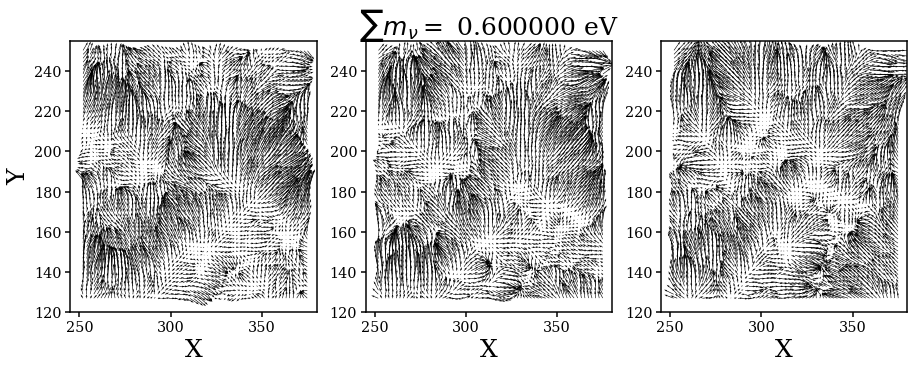

In [33]:
for i, dfield in enumerate(dfields): 
    fig = plt.figure(figsize=(15,5))
    for ii in range(3): 
        sub = fig.add_subplot(1,3,ii+1)
        sub.quiver(ics['Position'][0,:,:,5*ii], ics['Position'][1,:,:,5*ii], 
                   dfield['DispField'][0,:,:,5*ii], dfield['DispField'][1,:,:,5*ii], 
                   scale=1, scale_units='xy')
        sub.set_xlabel('X', fontsize=25)
        sub.set_xlim([245, 380])
        sub.set_ylim([120, 255])

        if ii == 0: sub.set_ylabel('Y', fontsize=25)
        if ii == 1: sub.set_title((r'$\sum m_\nu = $ %f eV' % round(mneuts[i],2)), fontsize=25)
    fig.savefig(''.join([UT.fig_dir(), '_mNuDispField_subbox_nreal_', str(nreal), '_mneut', str(round(mneuts[i],2)), '.png']),
                bbox_inches='tight')